In [4]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 讀入鳶尾花資料集
# 鳶尾花資料集是 sklearn 提供的內建資料集
iris = load_iris()
iris_data = iris.data  # 特徵資料 (花萼長度、花萼寬度、花瓣長度、花瓣寬度)
iris_label = iris.target  # 標籤資料 (0: setosa, 1: versicolor, 2: virginica)

# 切分訓練與測試資料
# 將資料分為訓練集 (70%) 和測試集 (30%)
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label, test_size=0.3)

# 建立決策樹分類器
clf = tree.DecisionTreeClassifier()  # 使用 sklearn 的決策樹分類器
iris_clf = clf.fit(train_data, train_label)  # 利用訓練資料進行模型訓練

# 計算並輸出訓練資料的正確率
print("訓練資料正確率:", clf.score(train_data, train_label))  # 使用訓練資料評估模型準確度

# 計算並輸出測試資料的正確率
print("測試資料正確率:", clf.score(test_data, test_label))  # 使用測試資料評估模型準確度

# 預測測試資料的結果
predict = clf.predict(test_data)  # 對測試資料進行分類預測

# 輸出測試資料的標準答案與模型預測的結果
print("標準答案:", test_label)  # 測試資料的實際標籤
print("預測答案:", predict)  # 測試資料的預測標籤

訓練資料正確率: 1.0
測試資料正確率: 0.9333333333333333
標準答案: [2 2 1 0 0 2 2 0 1 0 0 1 1 0 2 0 0 1 2 2 2 2 2 0 0 0 0 0 1 2 2 0 0 1 2 1 2
 0 1 2 0 0 2 1 1]
預測答案: [2 2 1 0 0 2 2 0 1 0 0 1 1 0 2 0 0 1 2 2 2 2 2 0 0 0 0 0 1 2 2 0 0 1 1 1 2
 0 1 1 0 0 2 1 2]


In [2]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) # 將決策樹儲存為DOT格式字
graph = graphviz.Source(dot_data) # 根據DOT資料生成圖形對象
graph.render("iris") #將結果存成pdf檔案

'iris.pdf'

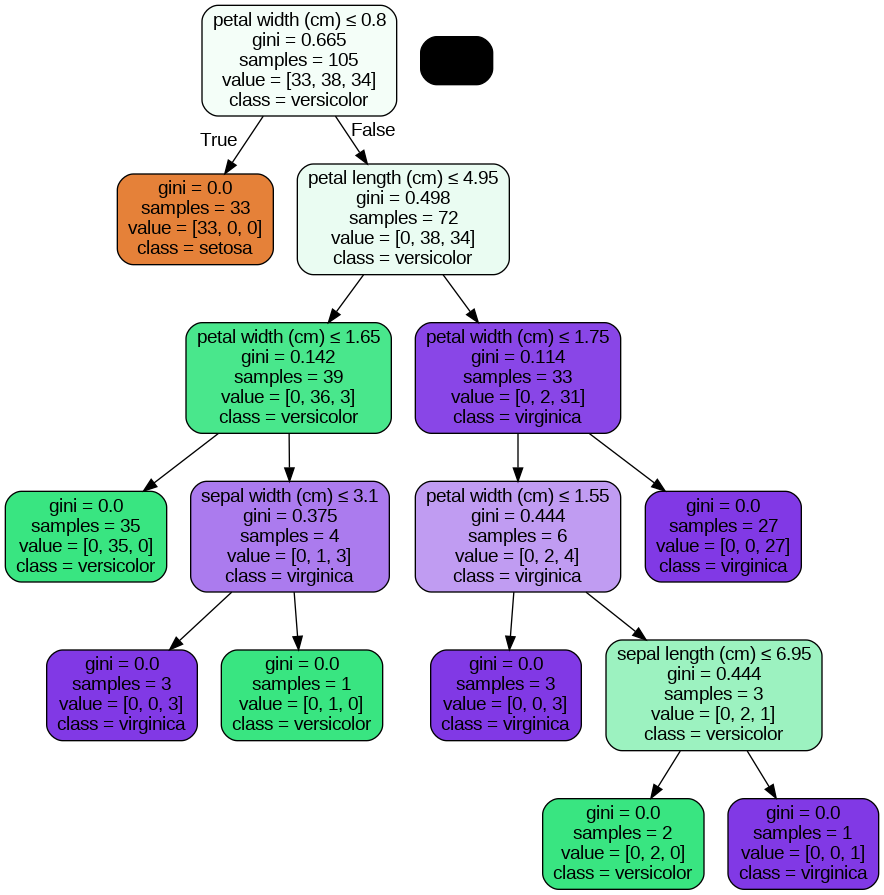

In [3]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,   # 不保存到檔案，直接返回字串
                feature_names=iris.feature_names, # 特徵名稱
                class_names=iris.target_names,  # 分類名稱
                filled=True, rounded=True,  # 節點填充顏色、節點的邊框變圓角
                special_characters=True)  # 支援特殊字符（例如箭頭）
graph = pydotplus.graph_from_dot_data(dot_data)  # 根據DOT資料生成Pydotplus圖形對
Image(graph.create_png())  #將結果用圖形化呈現